<a href="https://colab.research.google.com/github/faspy/data_science_projects/blob/gh-pages/my_uber_rides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis (EDA):** *A pratical approach using YOUR Uber rides dataset*

Exploring data is certainly one of the most important stages on Data Science process. Despite its simplicity, it could be a powerful tool to put you ahead on data and business context, as well as to determine crutial treatments before creating machine learning models.

To turn things a little bit more interesting, I've decided to have some fun with my personal Uber rides data and see which insights I could extract.

In this post, I will guide you through the following steps:
1. Business Problem Definition
2. Data Discovery
3. Data Preparation
4. Data Analysis & Storytelling

***Note: Data Preparation is usually a stage that requires lots of work around data formatting, cleansing and manipulation, but making your data CONSISTENT is surely a success factor for your analysis and future modeling.***


Let's check it out!

<img alt="Uber banner" width="60%" height="10%" src="https://raw.githubusercontent.com/faspy/images/main/uber_banner.jpg">

###**Requesting and downloading your personal dataset**

Uber's data download feature provides you in-depth information about your rides. You can request access to your data through the following link:
https://myprivacy.uber.com/privacy/exploreyourdata/download

After your request is done, an email with the download link will be sent to you (usually in the same day).

*For security purposes, your data is only available **during 7 days**.*

##<font color='blue'>**1. Business Problem Definition:** First things, first!</font>


Before starting manipulating and analysing data, the first thing you should do is to think about **THE PURPOSE**. What mean is that you should think about the reasons why you are up to conduct any analysis. If you are uncertain about this, simply starting formulating questions regarding your subject like **What? When? Where? Who? Which? How? How many? How much?**.

Depending on how many data and features you have, analysis could go to the infinite and beyond. So that's why (after thinking process) I decided to focus on the following questions:

     a. How many trips I did over the years?
     b. How many trips were Completed and Canceled?
     c. How many trips were not recovered by Uber after cancelling? (Churn Out?)
     d. Where most of the dropoffs ocurred?
     e. What product type is usually chosen?
     f. How much is the average fare and how much is payed by km ridden?
     g. Which months and weekdays have the highest average fares?
     h. Which was the longest/shortest and more expensive/cheaper ride?
     i. What is the average lead time before begining a trip?
     j. What is the average time spent on trips?

##<font color='blue'>**2. Data Discovery**</font>

Importing libraries and dataset.

In [158]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np

# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# My personal data storaged in my Github repository
rides = pd.read_csv('https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv')

Checking basic dataset information (data types and dimensions)

In [159]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


***.rename( )*** method allows you to rename axis labels (indexes and columns). In this case I decided to normalize column names to clean up coding, as long you can columns by typing **```<data_frame>.<column>```**.

In [160]:
rides.rename(columns={'Trip or Order Status': 'status', 'Request Time': 'request_time','Product Type':'product_type','Begin Trip Time':'begin_time',
                      'Begin Trip Lat':'begin_lat','Begin Trip Lng':'begin_lng','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat',
                      'Dropoff Lng':'dropoff_lng','Distance (miles)':'distance_miles','Fare Amount':'fare_amount',
                      'Fare Currency':'fare_currency','City':'city'}, inplace=True)

Use ***.head( )*** method to gain more sensibility around data formatting and understand the overall structure of the dataset values.

In [161]:
rides.head()

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,fare_currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


Taking a look on the **continuous variables**, we notice the presence of some outliers. However **these outliers do not seem to reflect any abnormal value** (e.g. fare_amount = 1000 BRL), which may let us a little bit more comfortable.

*P.S. In case abnormal values are found, some treatment should be probably considered (e.g. outliers replacement/removal).*

                count  mean   std  min  25%   50%   75%   max
distance_miles  544.0   4.1   3.8  0.0  1.2   3.4   6.0  19.7
fare_amount     544.0  15.8  11.6  0.0  7.8  14.4  24.3  58.8


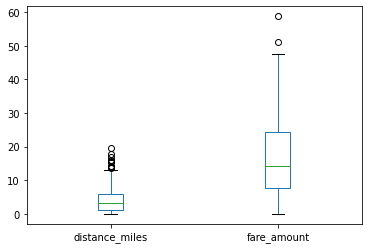

In [162]:
#creating an additional dataframe without Uber EATS records (out of analysis scope)
df1 = rides[rides.product_type!='UberEATS Marketplace'][['distance_miles','fare_amount']]

print(df1.describe().transpose().round(1));
df1.boxplot(grid=False);

The charts below show a different perspective of the variables distribution. In this case, we see that both variables present an **assimetric distribution (positive)**. For distance we notice that the higher frequency values are shorter distances, and for fare amount we have the same behaviour. 

Additionally, we also notice that the **standard deviation are high**, taking 'means' as our reference. This means that **values in both variables are very dispersal**.

                count  mean   std  min  25%   50%   75%   max
distance_miles  544.0   4.1   3.8  0.0  1.2   3.4   6.0  19.7
fare_amount     544.0  15.8  11.6  0.0  7.8  14.4  24.3  58.8


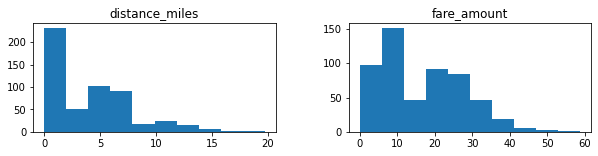

In [163]:
print(df1.describe().transpose().round(1));
df1.hist(grid=False, figsize=(10,2));

Not surprisingly we have a **strong correlation** between 'fare_amount' and 'distance_miles', inferring that **as much you stay on the ride, higher will the fare be**.

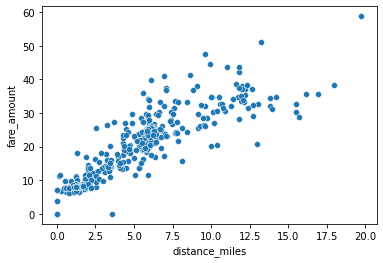

In [164]:
sns.scatterplot(x='distance_miles',y='fare_amount',data=df1);

##**<font color='blue'>3. Data Preparation</font>**

I decided to remove the column **fare_currency**, since all my trips happened inside a single country (Brazil).

In [165]:
rides.pop('fare_currency');

Now let's check existance of ***missing values***.

In [166]:
rides.isnull().sum().sort_values(ascending=False)

dropoff_lng       29
dropoff_lat       29
begin_lng         29
begin_lat         29
product_type       3
fare_amount        0
distance_miles     0
dropoff_time       0
begin_time         0
request_time       0
status             0
city               0
dtype: int64

Despite empty Lng and Lat values (29 total), there were found 3 records without ```product_type```. As shown below, these records are insignificant to my dataset, since practically no columns are fulfilled.

In [167]:
rides[rides.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
281,458,NaN,UNFULFILLED,2018-05-26 18:36:51 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
362,1449,NaN,UNFULFILLED,2018-02-13 01:59:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
392,1449,NaN,UNFULFILLED,2018-01-01 04:44:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


So now, let's get rid of these 3 records before proceding.

In [168]:
rides.dropna(subset = ['product_type'], inplace=True)

##**<font color='blue'>3.1 Data Cleansing**: Categorical features</font>

While analysing the first categorical column **```<product_type>```**, I could clearly see that some work was necessary, since I could find different values referring to the same category. Then, I **summarized 15 original categories in 5 ones**.

In [169]:
# Checking categories in product_type column
print(rides.product_type.value_counts())

# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

# New categories replacement
rides['product_type'].replace(product_mapping, inplace=True)

# Checking new categories in product_type column
print(rides.product_type.value_counts())

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
uberx                     1
UberBLACK                 1
Juntos                    1
Name: product_type, dtype: int64
UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: product_type, dtype: int64


As the scope of this analysis is only around Uber rides, I removed ***UberEATS*** records from my dataset. 

In [170]:
rides = rides[rides.product_type!='UberEATS Marketplace']

Our second categorical feature ```<status>``` seems well classified in 3 status, which will not require any kind of treatment.

In [171]:
rides.status.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
Name: status, dtype: int64

##<font color='blue'>**3.2 Data Transformation:** Handling dates</font>

**Dates** usually increase a lot your power of analysis, since you can break it down to different parts and generate insights from different perspectives. As previously shown, our dates features are in fact **object data types**, so we need to **convert them into datetime format**.

In [172]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):

  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
    
  return df

# Applying date_convertion function to date features 
rides = date_convertion(rides, ['request_time', 'begin_time', 'dropoff_time'])

Now, let's break down ```<request_time>``` feature into different date parts. I just did that for ```<request_time>```, since I'm assuming that all rides were completed in the same day ***(believe me, I have already checked that! :D )***.

In [173]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))

##<font color='blue'>**3.3 Feature Engineering:** Creating new features</font>

Based on ```<fare_amount>``` and ```<distance_miles>``` features I've created a new feature called ```<amount_km>```, which would help us understand **how much is payed by kilometer ridden**.

In [174]:
rides['distance_km'] = round(rides.distance_miles*1.60934,2)
rides['amount_km'] = round(rides.fare_amount/rides.distance_km,2)

Delta time between ```<request_time>``` and ```<begin_time>``` will let us now **how much time (in minutes) I usually waited for Uber cars to arrive at my destination**. In this case, it was calculated in a minutes base.

In [175]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

Similarly, delta time between ```<dropoff_time>``` and ```<begin_time>``` will let us now **how much time (in minutes) was spent on each trip**.

In [176]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

As features in records with **Canceled** and **Driver_Cancelled status** will not be useful for my analysis, I set them as **null values** to clean up a little bit more my dataset.

In [177]:
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides.status == 'CANCELED') | (rides.status == 'DRIVER_CANCELED'),['begin_time','dropoff_time']]= np.nan

##<font color='blue'>**4. Data Analysis & Storytelling:** It's show time!</font>

**RECOMMENDATION:** Do not start your analysis without completing the Business Problem Definition, since it determines your analysis' focus and quality. Besides that, this process will help you to think about new possibilities/questions while trying to answer the previous ones set. 

**NOTE:** In order to organize better my analysis, I will create an additional dataframe, **removing all trips with status ```CANCELED``` and ```DRIVER_CANCELED```**, since they should be disconsider in some questions.

In [178]:
completed_rides = rides[(rides.status!='CANCELED')&(rides.status!='DRIVER_CANCELED')] 

###**How many trips I did over the years?**

A total of **444 trips** were completed from Apr'16 to Jan'21. If we disconsider 2016 and 2021 (not full years), we can clearly see that from **2017 to 2019 the average rides per year is 124**, and that there is a **huge drop from 2019 to 2020 (-51%)**. This is easily explained by the COVID outbreak.

*Now, imagine if we extrapolate this result to all Uber users...*

Total trips:  444
2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


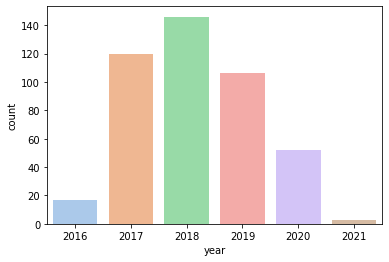

In [179]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');

###**How many trips were completed or canceled?**



Looking at the stacked bars below, we can see that **excluding 2015 and 2021**, 2020 has the highest cancelation ratem. This could be an alarming indicator, considering the drastical impacts caused to the businesses after Covid outbreak. In overall, **cancelation rate was 17.9%** (considering RIDERS and DRIVERS cancelations).

Total trips:  541
COMPLETED          82.1
CANCELED           16.1
DRIVER_CANCELED     1.8
Name: status, dtype: float64


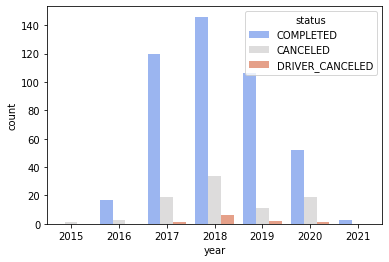

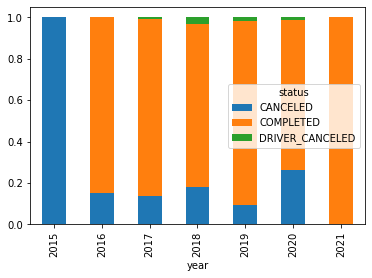

In [185]:
print('Total trips: ', rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))
sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='status', palette='coolwarm');

rides.groupby(by=['year'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

###**Where most of the dropoffs ocurred?**

The following heatmap dynamically shows the most frequented areas throughout different hues and intensities. This could be a valuable information for Uber to adjust prices and optimize demand in certain regions, also combining time space data to track users behaviours.

In [ ]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])

map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map

###**What product type is usually chosen?**

**UberX** is far the prefered product type with a frequency of **90.3%**. So I could say I am the type of user which usually looks for **affordable prices**.

In [ ]:
# Creating a serie with product types count
pt_rides = pd.Series(completed_rides.product_type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides.product_type.value_counts().sort_index(ascending=False)/completed_rides.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['product_type'].value_counts().plot(kind='bar');

###**How much is the average fare and how much is payed by km ridden?**
Considering all trips, the average amount spent by trip is **19.2 BRL**, ridding in approx. **8.1 km**. So, if we do a quick simulation on **how much I would spend in a year** to do daily round trips we would have: ```365 days * 2 trips * 19.2 BRL/fare = 14,016 BRL/year```

In [ ]:
print('Avg. fare:', round(completed_rides.fare_amount.mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides.fare_amount.sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides.fare_amount.sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

###**Which weekdays have the highest average fares?**
According to the chart below, we can see that **Fridays** and **Sundays** were (in average) the **most expensive weekdays**, however we clearly noticed that **Sunday has the higher price elasticity**, described by black line. This interesting fact, could led us to infer that users look for **more convenience on Sundays**, as well as be the day with **higher profitability for Uber and its drivers**.

In [ ]:
table= completed_rides.pivot_table(values='amount_km',columns='weekday',aggfunc='mean', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
table = table.reindex(column_order, axis=1)
table

In [ ]:
sns.catplot(x="weekday", y='amount_km', data=completed_rides, kind='bar', height=4, aspect=3, 
            order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

###**Which was the longest/shortest and more expensive/cheaper ride?**


The table below show records with the **longest (31.77 km)** and **shortest rides (0.24 km)**. 

In [ ]:
rides_distance = completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]
rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])
rides_distance

Analysing amount paid by km ridden we have: **expensive (46.96 BRL/km)** and **cheaper (0 BRL/km)**. Cheaper trip certainly refers to a free ride, while the expensive cost 46.96 BRL. This effect is basicaly driven by **fixed minimum fare in high demand periods**, since the total distance was only 0.24km.

In [ ]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])
rides_amount_km

###**What is the average lead time before begining a trip?**

It takes **approximately 5 minutes** to start trips, after they are requested.

In [ ]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

##<font color='blue'>**Conclusion**</font>



Exploratory Data Analysis is **not a trivial task**! It requires lots of work and patience, however it is surely a **powerful tool if correctly applied to your business context**. This post briefly demonstrated some tips and steps to make analysis easier and undoubtely highlighted the **crutial importance of a well defined business problem**, guiding all coding effort to a specific objective, also highlighting important insights. This business case also tried to reflect a **pratical application of python in daily business activities**, showing how fun, valuable and interesting it could become.